In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing Dependencies


Importing boston house price dataset


In [4]:
house_price_dataset=sklearn.datasets.fetch_california_housing()

In [8]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [6]:
#loading the dataset to a panda dataframe
house_price_dataframe=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)


In [7]:
house_price_dataframe.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
house_price_dataframe['price']=house_price_dataset.target

In [10]:
print(house_price_dataframe)

            0     1         2         3       4         5      6       7  price
0      8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1      8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2      7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3      5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4      3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422
...       ...   ...       ...       ...     ...       ...    ...     ...    ...
20635  1.5603  25.0  5.045455  1.133333   845.0  2.560606  39.48 -121.09  0.781
20636  2.5568  18.0  6.114035  1.315789   356.0  3.122807  39.49 -121.21  0.771
20637  1.7000  17.0  5.205543  1.120092  1007.0  2.325635  39.43 -121.22  0.923
20638  1.8672  18.0  5.329513  1.171920   741.0  2.123209  39.43 -121.32  0.847
20639  2.3886  16.0  5.254717  1.162264  1387.0  2.616981  39.37 -121.24  0.894

[20640 rows x 9 columns]


In [12]:
house_price_dataframe.shape


(20640, 9)

In [17]:
#check for missing value
house_price_dataframe.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
price,0


In [18]:
house_price_dataframe.describe()

,0,1,2,3,4,5,6,7,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding relation b/w features

In [19]:
correlation=house_price_dataframe.corr()

<Axes: >

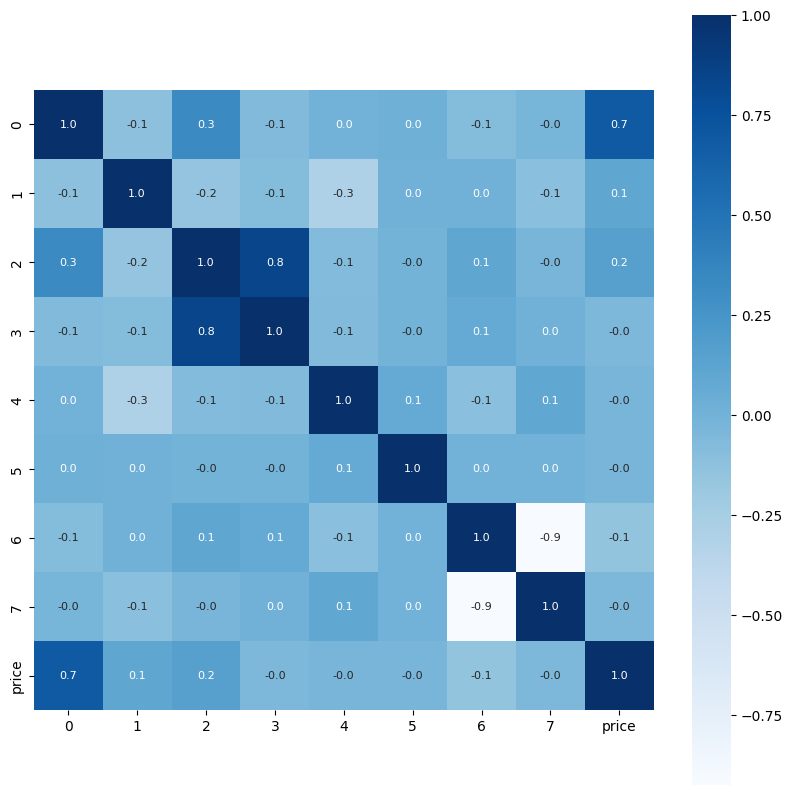

In [22]:
#constructing a heatmap the corelation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [23]:
X=house_price_dataframe.drop(['price'],axis=1)
Y=house_price_dataframe['price']

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [27]:
model=XGBRegressor()
#decision tree based model

In [28]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
training_data_prediction=model.predict(X_train)

In [30]:
#R squared error
score=metrics.r2_score(Y_train,training_data_prediction)
print('R squared error:',score)

R squared error: 0.943650140819218


In [31]:
score2=metrics.mean_absolute_error(Y_train,training_data_prediction)
print('Mean Absolute Error:',score2)


Mean Absolute Error: 0.1933648700612105


In [32]:
test_data_prediction=model.predict(X_test)

In [33]:
score3=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error:',score3)

R squared error: 0.8338000331788725


In [34]:
score4=metrics.mean_absolute_error(Y_test,test_data_prediction)
print('Mean Absolute Error:',score4)

Mean Absolute Error: 0.3108631800268186


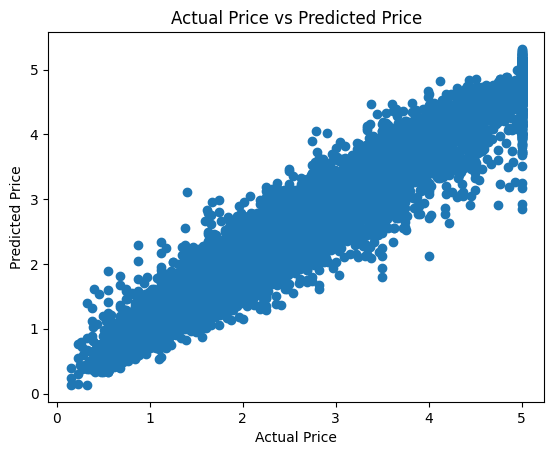

In [37]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()